# Student : Steven Melendez Lara
### Curso: XTOL - Module 5 - Task 3 - Group: C-3 
### Date: March 2020

In [35]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Link to this solution
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/

# 1 - Task Description

Hi,

Now that you have successfully imported, prepared and explored the data you are ready to start exploring some possible tools for your analysis. When you worked in R you used the caret package for many of your machine learning and data mining tasks. Python has a similar library called Sci-Kit Learn that the client has specifically asked us to use because it is likely to be compatible a custom software solution they plan to deploy.

In this task you’ll build your models just as you have done previously, but with a different set of tools. As you progress remember the following:

Let the data tell the story – don't make any assumptions.
It is often best to build three or more models and compare the results.
Make sure you have chosen the correct tools for the type of data you have.
I suggest you start this task with a quick orientation on Sci-Kit Learn to become familiar with the benefits of using it and how to use it effectively for this project. 

GR 

Guido Rossum
Senior Data Scientist
Credit One
www.creditonellc.com

## 1.1 Deliverables
### 1.1.1 General Requirements

### 1.1.2 Specific Requirements

### 1.1.3 Dataset Description

# 2 - Task Solution

### 2.1- Cleaning and Pre-processing

In [34]:
# Import Libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random
%matplotlib inline
import scipy
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from pickle import dump
from pickle import load

In [3]:
credit = pd.read_csv(r'C:\Users\smele\Documents\XTOL Big Data\Module 5\Task 2 - Prepare and Explore the Data\default of credit card clients.csv', index_col=0, header =1)
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [6]:
# change variable types
credit['SEX'] = credit['SEX'].astype('category')
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')
credit['PAY_0'] = credit['PAY_0'].astype('category')
credit['PAY_2'] = credit['PAY_2'].astype('category')
credit['PAY_3'] = credit['PAY_3'].astype('category')
credit['PAY_4'] = credit['PAY_4'].astype('category')
credit['PAY_5'] = credit['PAY_5'].astype('category')
credit['PAY_6'] = credit['PAY_6'].astype('category')
credit['default payment next month'] = credit['default payment next month'].astype('category')

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int

In [8]:
credit.shape

(30000, 24)

In [9]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


### 2.2 - Covariance Estimation


In [10]:
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  0.144713   0.285430   0.278314   0.283236   0.293988   
AGE         0.144713  1.000000   0.056239   0.054283   0.053710   0.051353   
BILL_AMT1   0.285430  0.056239   1.000000   0.951484   0.892279   0.860272   
BILL_AMT2   0.278314  0.054283   0.951484   1.000000   0.928326   0.892482   
BILL_AMT3   0.283236  0.053710   0.892279   0.928326   1.000000   0.923969   
BILL_AMT4   0.293988  0.051353   0.860272   0.892482   0.923969   1.000000   
BILL_AMT5   0.295562  0.049345   0.829779   0.859778   0.883910   0.940134   
BILL_AMT6   0.290389  0.047613   0.802650   0.831594   0.853320   0.900941   
PAY_AMT1    0.195236  0.026147   0.140277   0.280365   0.244335   0.233012   
PAY_AMT2    0.178408  0.021785   0.099355   0.100851   0.316936   0.207564   
PAY_AMT3    0.210167  0.029247   0.156887   0.150718   0.130011   0.300023   
PAY_AMT4    0.203242  0.021379   0.158303   0.147398   0.143405 

In [11]:
covMat = credit.iloc[:,1:25].cov()
print(covMat)

                    AGE     BILL_AMT1     BILL_AMT2     BILL_AMT3  \
AGE           84.969755  3.817293e+04  3.561366e+04  3.433425e+04   
BILL_AMT1  38172.933546  5.422240e+09  4.986670e+09  4.556511e+09   
BILL_AMT2  35613.657962  4.986670e+09  5.065705e+09  4.582086e+09   
BILL_AMT3  34334.251320  4.556511e+09  4.582086e+09  4.809338e+09   
BILL_AMT4  30453.108180  4.075286e+09  4.086508e+09  4.122238e+09   
BILL_AMT5  27654.067800  3.714795e+09  3.720401e+09  3.726780e+09   
BILL_AMT6  26137.648547  3.519876e+09  3.524868e+09  3.524247e+09   
PAY_AMT1    3992.041735  1.710894e+08  3.305146e+08  2.806565e+08   
PAY_AMT2    4626.861549  1.685692e+08  1.653859e+08  5.064226e+08   
PAY_AMT3    4746.824393  2.034048e+08  1.888731e+08  1.587478e+08   
PAY_AMT4    3087.324192  1.826164e+08  1.643518e+08  1.558003e+08   
PAY_AMT5    3218.052172  1.879091e+08  1.717652e+08  1.904126e+08   
PAY_AMT6    3191.903901  2.347681e+08  2.204845e+08  2.247817e+08   

              BILL_AMT4     BILL_

### 2.3 - EDA


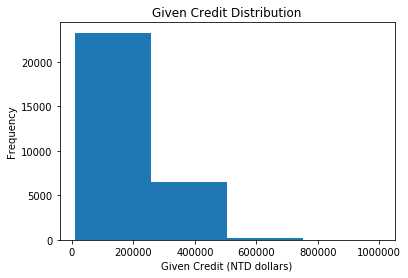

In [12]:
plt.hist(credit['LIMIT_BAL'], bins=4)
plt.xlabel('Given Credit (NTD dollars)')
plt.ylabel('Frequency')
plt.title('Given Credit Distribution')
plt.show()

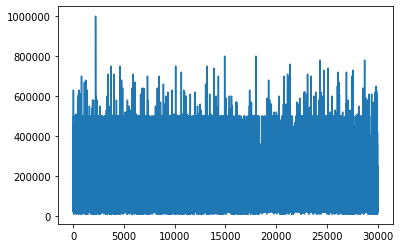

In [13]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

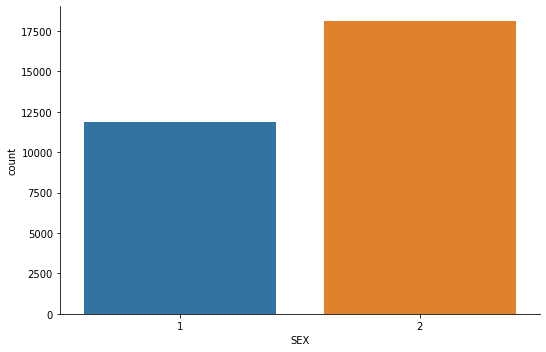

In [16]:
# Plot the number of males and females
sns.catplot('SEX', data=credit, kind='count', aspect=1.5)

C:\Users\smele\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


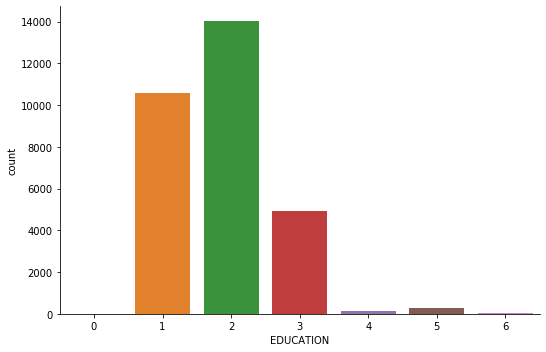

In [15]:
# Plot the number of different levels of education
sns.factorplot('EDUCATION', data=credit, kind='count', aspect=1.5)

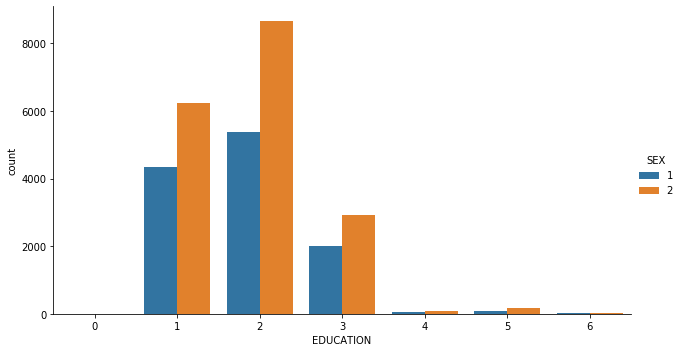

In [17]:
# Plot group by Sex and education
sns.factorplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75)

In [18]:
default = credit[credit['default payment next month']==1]
not_default = credit[credit['default payment next month']==0]

In [19]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


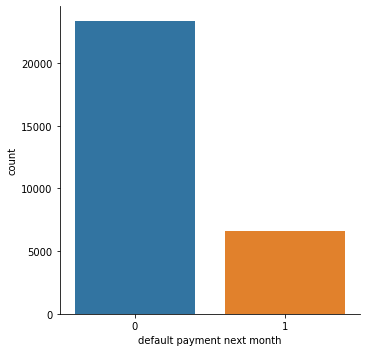

In [20]:
# Factor plot of those who defaulted vs. who didn't
sns.factorplot('default payment next month', data=credit, kind='count')

In [21]:
credit=credit.rename(columns={'default payment next month': 'default'})
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null category
dtypes: category(10), int64(14)
memory usage:

C:\Users\smele\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


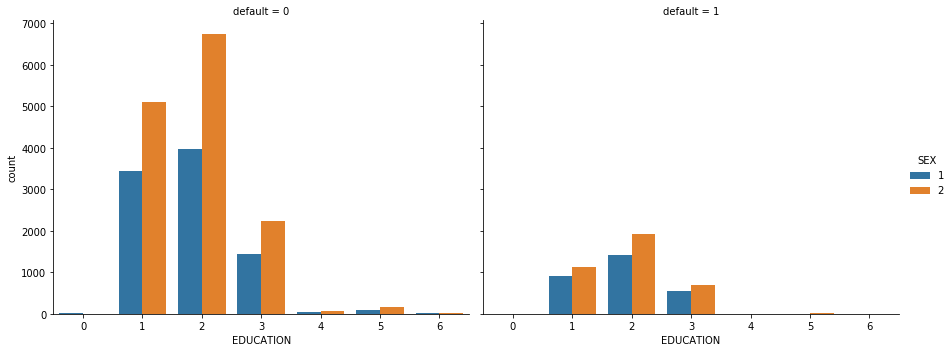

In [22]:
# Split the customers by default 
sns.factorplot('EDUCATION', data=credit, kind='count', hue='SEX', col='default', aspect=1.25, size=5)

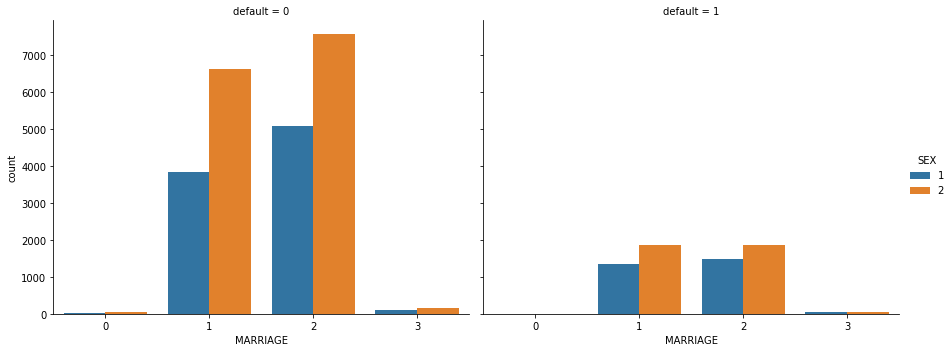

In [24]:
sns.factorplot('MARRIAGE', data=credit, kind='count', hue='SEX', col='default',aspect=1.25, size=5)

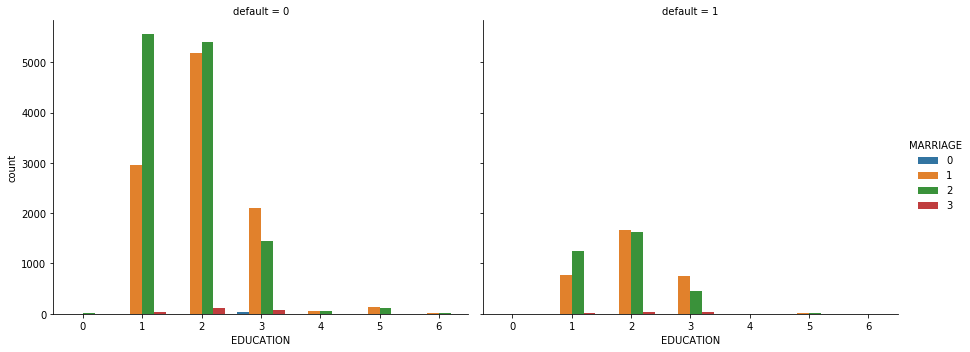

In [26]:
sns.factorplot('EDUCATION', data=credit, kind='count', hue='MARRIAGE', col='default',aspect=1.25, size=5)

### Grouped by gender

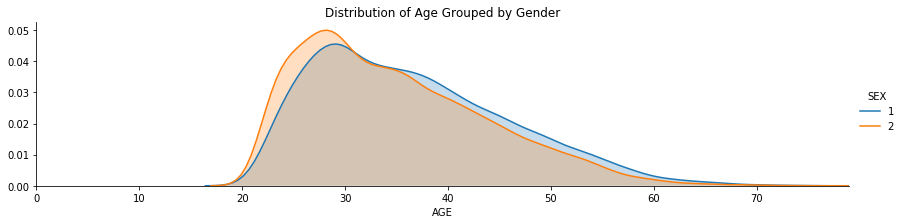

In [29]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

### Grouped by marriage

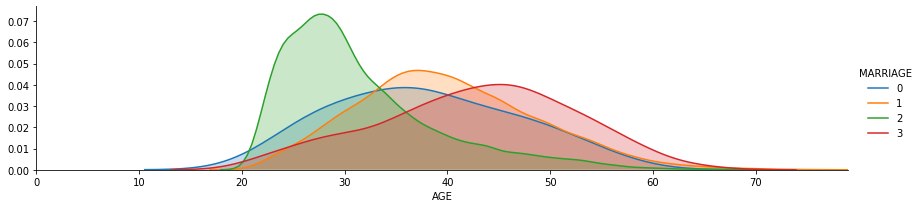

In [30]:
fig = sns.FacetGrid(credit, hue='MARRIAGE', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### Grouped by Education

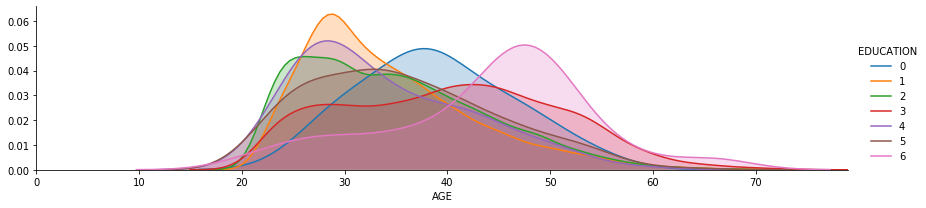

In [32]:
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### Group by Repayment Status

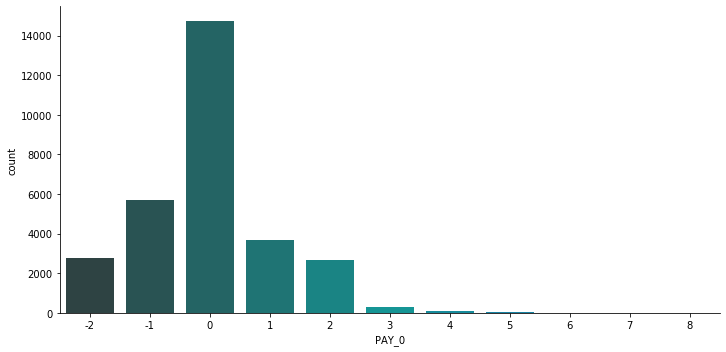

In [33]:
sns.factorplot('PAY_0', data=credit, kind='count',aspect=2,palette='winter_d')

### Analysis

### Conclusions

### 2.4 - One-Hot Encoding

In [94]:
credit= pd.read_csv(r'C:\Users\smele\Documents\XTOL Big Data\Module 5\Task 2 - Prepare and Explore the Data\default of credit card clients.csv', header =1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [96]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int

In [97]:
credit=credit.drop('ID', axis=1)

In [98]:
# change variable types
credit['SEX'] = credit['SEX'].astype('category')
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')
credit['PAY_0'] = credit['PAY_0'].astype('category')
credit['PAY_2'] = credit['PAY_2'].astype('category')
credit['PAY_3'] = credit['PAY_3'].astype('category')
credit['PAY_4'] = credit['PAY_4'].astype('category')
credit['PAY_5'] = credit['PAY_5'].astype('category')
credit['PAY_6'] = credit['PAY_6'].astype('category')
credit['default payment next month'] = credit['default payment next month'].astype('category')
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int

In [99]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int

In [100]:
XC=credit.loc[:,['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
XC.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [101]:
scaler = StandardScaler()
rescaledX = scaler.fit_transform(XC)
print(rescaledX[0:5,:])
rescaledX= pd.DataFrame(rescaledX)
rescaledX.columns = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
rescaledX.head()

[[-1.13672015 -1.24601985 -0.64250107 -0.64739923 -0.66799331 -0.67249727
  -0.66305853 -0.65272422 -0.34194162 -0.22708564 -0.29680127 -0.30806256
  -0.31413612 -0.29338206]
 [-0.3659805  -1.02904717 -0.65921875 -0.66674657 -0.63925429 -0.62163594
  -0.60622927 -0.59796638 -0.34194162 -0.21358766 -0.24000461 -0.24422965
  -0.31413612 -0.18087821]
 [-0.59720239 -0.16115646 -0.29855966 -0.49389911 -0.48240819 -0.44973025
  -0.41718767 -0.39162956 -0.25029158 -0.19188673 -0.24000461 -0.24422965
  -0.24868274 -0.01212243]
 [-0.90549825  0.16430256 -0.05749103 -0.01329269  0.03284648 -0.23237268
  -0.18672897 -0.15657889 -0.22119058 -0.16936116 -0.22864528 -0.23784635
  -0.24416646 -0.23713013]
 [-0.90549825  2.33402934 -0.57861809 -0.61131792 -0.16118875 -0.3469972
  -0.34813724 -0.33148158 -0.22119058  1.33503416  0.27116536  0.26643369
  -0.26903874 -0.255187  ]]


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [102]:
credit = pd.get_dummies(credit,drop_first=True)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 83 columns):
LIMIT_BAL                       30000 non-null int64
AGE                             30000 non-null int64
BILL_AMT1                       30000 non-null int64
BILL_AMT2                       30000 non-null int64
BILL_AMT3                       30000 non-null int64
BILL_AMT4                       30000 non-null int64
BILL_AMT5                       30000 non-null int64
BILL_AMT6                       30000 non-null int64
PAY_AMT1                        30000 non-null int64
PAY_AMT2                        30000 non-null int64
PAY_AMT3                        30000 non-null int64
PAY_AMT4                        30000 non-null int64
PAY_AMT5                        30000 non-null int64
PAY_AMT6                        30000 non-null int64
SEX_2                           30000 non-null uint8
EDUCATION_1                     30000 non-null uint8
EDUCATION_2                     30000 non-n

In [105]:
credit1=credit.drop(['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1,)
credit1.head()

,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default payment next month_1
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [106]:
credit_df = pd.concat([rescaledX, credit1], axis=1)
credit_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default payment next month_1
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,0,0,0,0,0,0,0,0,0,1
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,0,0,1,0,0,0,0,0,0,1
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,0,1,0,0,0,0,0,0,0,0
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,0,1,0,0,0,0,0,0,0,0
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,0,1,0,0,0,0,0,0,0,0


In [107]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 83 columns):
LIMIT_BAL                       30000 non-null float64
AGE                             30000 non-null float64
BILL_AMT1                       30000 non-null float64
BILL_AMT2                       30000 non-null float64
BILL_AMT3                       30000 non-null float64
BILL_AMT4                       30000 non-null float64
BILL_AMT5                       30000 non-null float64
BILL_AMT6                       30000 non-null float64
PAY_AMT1                        30000 non-null float64
PAY_AMT2                        30000 non-null float64
PAY_AMT3                        30000 non-null float64
PAY_AMT4                        30000 non-null float64
PAY_AMT5                        30000 non-null float64
PAY_AMT6                        30000 non-null float64
SEX_2                           30000 non-null uint8
EDUCATION_1                     30000 non-null uint8
EDUCATION_2    

In [108]:
Y = credit_df['default payment next month_1'].values
X=credit_df.drop('default payment next month_1', axis=1).values

### 2.5 - Feature Engineering

In [109]:
model = LogisticRegression()
rfe = RFE(model)
rfem = rfe.fit(X, Y)
print("Num Features: %d" % rfem.n_features_)
print("Selected Features: %s" % rfem.support_)
print("Feature Ranking: %s" % rfem.ranking_)

Num Features: 41
Selected Features: [ True False False False False False False False False False False False
 False False False False False False  True  True False  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
  True False False  True  True  True  True  True False False False  True
  True False  True  True  True False False False  True  True False  True
  True  True False  True False False  True False  True False False  True
 False  True  True False  True False False  True False  True]
Feature Ranking: [ 1 34 16 15 11 40 38 27  9  7 36 35 33 29 12  3  2  4  1  1 37  1  1  1
  1 10  1  1  1  1  1  1  1  1  1 24  1 25 23  1  1  1  1  1 39 32 28  1
  1 14  1  1  1 18 20 31  1  1  8  1  1  1 17  1 13 42  1 26  1 19  5  1
  6  1  1 30  1 41 22  1 21  1]


In [110]:
Xr=credit_df.iloc[:,[0,18,19,21,22,23,24,26,27,28,29,30,31,32,33,34,36,39,40,41,42,43,47,48,50,51,52,56,57,59,60,61,63,66,68,71,73,74,76,79,81]]
Xr.head()

,LIMIT_BAL,EDUCATION_4,EDUCATION_5,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_1,PAY_0_2,PAY_0_3,...,PAY_4_6,PAY_4_8,PAY_5_2,PAY_5_4,PAY_5_7,PAY_6_-1,PAY_6_0,PAY_6_3,PAY_6_6,PAY_6_8
0,-1.136720,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.365981,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.597202,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.905498,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.905498,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [111]:
Xr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 41 columns):
LIMIT_BAL      30000 non-null float64
EDUCATION_4    30000 non-null uint8
EDUCATION_5    30000 non-null uint8
MARRIAGE_1     30000 non-null uint8
MARRIAGE_2     30000 non-null uint8
MARRIAGE_3     30000 non-null uint8
PAY_0_-1       30000 non-null uint8
PAY_0_1        30000 non-null uint8
PAY_0_2        30000 non-null uint8
PAY_0_3        30000 non-null uint8
PAY_0_4        30000 non-null uint8
PAY_0_5        30000 non-null uint8
PAY_0_6        30000 non-null uint8
PAY_0_7        30000 non-null uint8
PAY_0_8        30000 non-null uint8
PAY_2_-1       30000 non-null uint8
PAY_2_1        30000 non-null uint8
PAY_2_4        30000 non-null uint8
PAY_2_5        30000 non-null uint8
PAY_2_6        30000 non-null uint8
PAY_2_7        30000 non-null uint8
PAY_2_8        30000 non-null uint8
PAY_3_2        30000 non-null uint8
PAY_3_3        30000 non-null uint8
PAY_3_5        30000 non-

### 2.6 - Classification


In [112]:
X1=Xr.values
Y = credit_df['default payment next month_1'].values

In [113]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X1,Y,test_size=0.3,random_state=7)

LR: 0.820095 (0.011250)
KNN: 0.795952 (0.010843)
CART: 0.801286 (0.010710)
NB: 0.794476 (0.012217)
SVM: 0.818286 (0.011138)


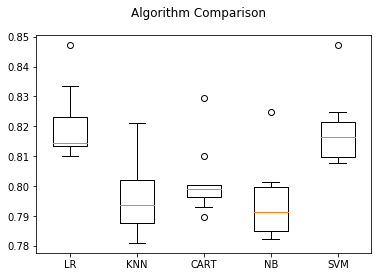

In [114]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 2.7 - Improve Performance with Ensembles

In [117]:
# Stochastic Gradient Boosting Classification
num_trees = 100
kfold = KFold(n_splits=10, random_state=7)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=7)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.8205238095238094


In [118]:
# Random Forest Classification
num_trees = 100
max_features = 10
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.8027142857142857


In [119]:
# Extra Trees Classification
num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7998571428571428


In [120]:
# Bagged Decision Trees for Classification
kfold = KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.8007142857142856


### 2.8 - Model Tuning

In [121]:
# Stochastic Gradient Boosting Classification tuning
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]),learning_rate=np.array([0.001, 0.01, 0.1]))
model = GradientBoostingClassifier(random_state=7)
kfold = KFold(n_splits=10, random_state=7)
gbm_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
gbmresult = gbm_cv.fit(X_train, y_train)
print("Best: %f using %s" % (gbmresult.best_score_, gbmresult.best_params_))
means = gbmresult.cv_results_['mean_test_score']
stds = gbmresult.cv_results_['std_test_score']
params = gbmresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820524 using {'learning_rate': 0.1, 'n_estimators': 100}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 150}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 200}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 250}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 300}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 350}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 400}
0.778333 (0.012212) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.817000 (0.010844) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.818143 (0.010531) with: {'learning_rate': 0.01, 'n_estimators': 150}
0.818238 (0.010550) with: {'learning_rate': 0.01, 'n_estimators': 200}
0.818238 (0.010622) with: {'learning_rate': 0.01, 'n_estimators': 250}
0.8192

[5.38567758e-02 5.92482519e-04 5.03440249e-03 2.68386135e-03
 1.14890993e-03 1.14984091e-03 4.08146248e-03 6.65084673e-02
 5.27423199e-01 5.81001954e-02 1.06253926e-02 1.01274556e-03
 7.30006760e-04 3.36299181e-04 9.87975736e-04 1.12034522e-02
 3.24150079e-04 8.02797705e-04 2.91185267e-03 2.51981056e-03
 1.84930413e-03 0.00000000e+00 1.18947378e-01 1.85262247e-03
 5.61807023e-04 1.17772536e-03 0.00000000e+00 0.00000000e+00
 4.11054513e-02 2.59091563e-03 1.53835633e-04 1.72276479e-04
 0.00000000e+00 3.71450057e-02 1.41184220e-03 1.88855255e-03
 1.25795191e-02 1.85313772e-02 7.35688309e-03 3.98753540e-04
 2.42670807e-04]


Text(0, 0.5, 'Feature Importance Score')

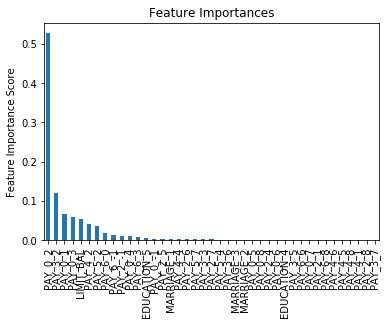

In [122]:
# feature importantce
print(gbm_cv.best_estimator_.feature_importances_)
feat_imp = pd.Series(gbm_cv.best_estimator_.feature_importances_,Xr.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [123]:
# LogisticRegression Algorithm tuning
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
logreg_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
logresult=logreg_cv.fit(X_train, y_train)
print("Best: %f using %s" % (logresult.best_score_, logresult.best_params_))
means = logresult.cv_results_['mean_test_score']
stds = logresult.cv_results_['std_test_score']
params = logresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.821000 using {'C': 1389495.494373136, 'penalty': 'l2'}
0.778333 (0.012212) with: {'C': 1e-05, 'penalty': 'l1'}
0.778333 (0.012212) with: {'C': 1e-05, 'penalty': 'l2'}
0.778333 (0.012212) with: {'C': 8.483428982440725e-05, 'penalty': 'l1'}
0.778333 (0.012212) with: {'C': 8.483428982440725e-05, 'penalty': 'l2'}
0.778333 (0.012212) with: {'C': 0.0007196856730011522, 'penalty': 'l1'}
0.788857 (0.011709) with: {'C': 0.0007196856730011522, 'penalty': 'l2'}
0.806381 (0.011345) with: {'C': 0.006105402296585327, 'penalty': 'l1'}
0.807095 (0.010640) with: {'C': 0.006105402296585327, 'penalty': 'l2'}
0.817429 (0.010978) with: {'C': 0.05179474679231213, 'penalty': 'l1'}
0.817571 (0.011554) with: {'C': 0.05179474679231213, 'penalty': 'l2'}
0.819667 (0.011409) with: {'C': 0.4393970560760795, 'penalty': 'l1'}
0.820048 (0.011437) with: {'C': 0.4393970560760795, 'penalty': 'l2'}
0.820810 (0.011115) with: {'C': 3.727593720314938, 'penalty': 'l1'}
0.820857 (0.011082) with: {'C': 3.727593720314938

In [124]:
# DecisionTreeClassifier Algorithm tuning
# Setup the parameters and distributions to sample from: param_dist
kfold = KFold(n_splits=10, random_state=7)
param_dist = {"max_depth": [3,5,7],
              "max_features": [3,5,7,9],
              "min_samples_leaf": [30,50,100],
              "criterion": ["gini", "entropy"]}
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv =RandomizedSearchCV(tree, param_dist, cv=kfold)
# Fit it to the data
treeresult=tree_cv.fit(X_train, y_train)
print("Best: %f using %s" % (treeresult.best_score_, treeresult.best_params_))
means = treeresult.cv_results_['mean_test_score']
stds = treeresult.cv_results_['std_test_score']
params = treeresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.812190 using {'min_samples_leaf': 100, 'max_features': 9, 'max_depth': 5, 'criterion': 'entropy'}
0.803048 (0.020569) with: {'min_samples_leaf': 100, 'max_features': 9, 'max_depth': 7, 'criterion': 'entropy'}
0.796429 (0.014674) with: {'min_samples_leaf': 100, 'max_features': 7, 'max_depth': 3, 'criterion': 'entropy'}
0.796571 (0.013480) with: {'min_samples_leaf': 30, 'max_features': 3, 'max_depth': 5, 'criterion': 'entropy'}
0.788857 (0.018192) with: {'min_samples_leaf': 50, 'max_features': 5, 'max_depth': 3, 'criterion': 'entropy'}
0.812190 (0.013293) with: {'min_samples_leaf': 100, 'max_features': 9, 'max_depth': 5, 'criterion': 'entropy'}
0.799905 (0.010613) with: {'min_samples_leaf': 100, 'max_features': 9, 'max_depth': 3, 'criterion': 'gini'}
0.794810 (0.013365) with: {'min_samples_leaf': 100, 'max_features': 5, 'max_depth': 7, 'criterion': 'gini'}
0.793143 (0.016244) with: {'min_samples_leaf': 100, 'max_features': 5, 'max_depth': 3, 'criterion': 'entropy'}
0.801286 (0.01

In [134]:
# KNN Algorithm tuning
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()
kfold = KFold(n_splits=10, random_state=7)
knn_cv= GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
knnresult = knn_cv.fit(X_train, y_train)
print("Best: %f using %s" % (knnresult.best_score_, knnresult.best_params_))
means = knnresult.cv_results_['mean_test_score']
stds = knnresult.cv_results_['std_test_score']
params = knnresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.814524 using {'n_neighbors': 15}
0.728762 (0.016361) with: {'n_neighbors': 1}
0.782190 (0.010909) with: {'n_neighbors': 3}
0.795952 (0.010843) with: {'n_neighbors': 5}
0.801667 (0.009776) with: {'n_neighbors': 7}
0.810048 (0.010451) with: {'n_neighbors': 9}
0.811762 (0.009557) with: {'n_neighbors': 11}
0.813238 (0.010009) with: {'n_neighbors': 13}
0.814524 (0.009183) with: {'n_neighbors': 15}
0.814095 (0.009205) with: {'n_neighbors': 17}
0.813143 (0.010142) with: {'n_neighbors': 19}
0.814190 (0.009464) with: {'n_neighbors': 21}


In [125]:
# SVM Algorithm tuning
kfold = KFold(n_splits=10, random_state=7)
# Specify the hyperparameter space
param_grid = {'C':[1, 10, 100],
              'gamma':[0.1, 0.01]}
model =SVC()
kfold = KFold(n_splits=10, random_state=7)
svc_cv= GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
svcresult = svc_cv.fit(X_train, y_train)
print("Best: %f using %s" % (svcresult.best_score_, svcresult.best_params_))
means = svcresult.cv_results_['mean_test_score']
stds = svcresult.cv_results_['std_test_score']
params = svcresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820952 using {'C': 10, 'gamma': 0.1}
0.818810 (0.011769) with: {'C': 1, 'gamma': 0.1}
0.818238 (0.011303) with: {'C': 1, 'gamma': 0.01}
0.820952 (0.011523) with: {'C': 10, 'gamma': 0.1}
0.819619 (0.011795) with: {'C': 10, 'gamma': 0.01}
0.817810 (0.010295) with: {'C': 100, 'gamma': 0.1}
0.819000 (0.011646) with: {'C': 100, 'gamma': 0.01}


In [126]:
# Random Forest Classification tuning
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]),max_features=np.array([3,5,7,9,10]))
model = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=7)
rf_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
rfresult = rf_cv.fit(X_train, y_train)
print("Best: %f using %s" % (rfresult.best_score_, rfresult.best_params_))
means = rfresult.cv_results_['mean_test_score']
stds = rfresult.cv_results_['std_test_score']
params = rfresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.803095 using {'max_features': 5, 'n_estimators': 400}
0.801286 (0.010215) with: {'max_features': 3, 'n_estimators': 50}
0.802524 (0.010409) with: {'max_features': 3, 'n_estimators': 100}
0.802000 (0.008515) with: {'max_features': 3, 'n_estimators': 150}
0.801714 (0.009852) with: {'max_features': 3, 'n_estimators': 200}
0.803000 (0.009003) with: {'max_features': 3, 'n_estimators': 250}
0.801333 (0.009568) with: {'max_features': 3, 'n_estimators': 300}
0.802571 (0.010593) with: {'max_features': 3, 'n_estimators': 350}
0.802048 (0.009621) with: {'max_features': 3, 'n_estimators': 400}
0.800524 (0.009016) with: {'max_features': 5, 'n_estimators': 50}
0.801095 (0.008886) with: {'max_features': 5, 'n_estimators': 100}
0.801333 (0.009452) with: {'max_features': 5, 'n_estimators': 150}
0.801952 (0.009079) with: {'max_features': 5, 'n_estimators': 200}
0.801714 (0.008766) with: {'max_features': 5, 'n_estimators': 250}
0.801524 (0.009696) with: {'max_features': 5, 'n_estimators': 300}
0.

### 2.9 - Model Evaluation

In [127]:
# Predict the labels of the test set: y_pred using Gradient Boosting Classification
y_pred = gbm_cv.predict(X_test)
print(y_pred)
# Compute and print metrics
print("Accuracy: {}".format(gbm_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(gbm_cv.best_params_))

[0 0 0 ... 1 0 0]
Accuracy: 0.8201111111111111
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7019
           1       0.67      0.35      0.46      1981

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

Tuned Model Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [128]:
# Predict the labels of the test set: y_pred using LogisticRegression
y_pred2 = logreg_cv.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(logreg_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred2))
print("Tuned Model Parameters: {}".format(logreg_cv.best_params_))

Accuracy: 0.8186666666666667
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7019
           1       0.67      0.35      0.46      1981

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

Tuned Model Parameters: {'C': 1389495.494373136, 'penalty': 'l2'}


In [135]:
# Predict the labels of the test set: y_pred using KNN
y_pred3 = knn_cv.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(knn_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred3))
print("Tuned Model Parameters: {}".format(knn_cv.best_params_))

Accuracy: 0.8163333333333334
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7019
           1       0.65      0.35      0.46      1981

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000

Tuned Model Parameters: {'n_neighbors': 15}


In [130]:
# Predict the labels of the test set: y_pred using SVM
y_pred4 = svc_cv.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(svc_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred4))
print("Tuned Model Parameters: {}".format(svc_cv.best_params_))

Accuracy: 0.8188888888888889
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7019
           1       0.68      0.34      0.45      1981

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000

Tuned Model Parameters: {'C': 10, 'gamma': 0.1}


In [131]:
# Predict the labels of the test set: y_pred using Random Forest
y_pred5 = rf_cv.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(rf_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred5))
print("Tuned Model Parameters: {}".format(rf_cv.best_params_))

Accuracy: 0.7968888888888889
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      7019
           1       0.56      0.36      0.44      1981

    accuracy                           0.80      9000
   macro avg       0.70      0.64      0.66      9000
weighted avg       0.77      0.80      0.78      9000

Tuned Model Parameters: {'max_features': 5, 'n_estimators': 400}


### Save the model in disk

In [136]:
# save the model to disk
filename = 'finalized_model.sav'
dump(gbm_cv, open(filename, 'wb'))

# 3 - Results

### Load the Model

In [137]:
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8201111111111111


# 4 - Results Discussion

# 5 - Recomendations

# 6 - References